In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import json
import csv

TL_sentence_path = '/content/drive/MyDrive/LSTM+attention/sentence_dataTL.csv'
VL_sentence_path = '/content/drive/MyDrive/LSTM+attention/sentence_dataVL.csv'

# data파일 불러오기
TL_sentence_data = pd.read_csv(TL_sentence_path, encoding='utf-8')
VL_sentence_data = pd.read_csv(VL_sentence_path, encoding='utf-8')

# 중복 제거, Pronuncication 열은 필요 없다고 생각
TL_sentence_data.drop('Pronunciation', axis=1, inplace=True)
TL_sentence_data = TL_sentence_data.drop_duplicates().reset_index(drop=True)
VL_sentence_data.drop('Pronunciation', axis=1, inplace=True)
VL_sentence_data = VL_sentence_data.drop_duplicates().reset_index(drop=True)

In [3]:
TL_sentence_data[:5]

,Dialect,Standard
0,여기는 옥수갱이 잘 된다 카던디 옥수갱이 말고는 무신 농사를 많이 짓습니껴,여기는 옥수수 잘 된다 하던데 옥수수 말고는 무슨 농사를 많이 짓습니까
1,장례 관련해서 초상집 같은 데 가가 하지 말아야 데는 기 있습니껴,장례 관련해서 초상집 같은 데 가서 하지 말아야 데는 게 있습니까
2,예전에는 집 안에서 여자들이 남자 위로 띠넘으면 안 덴다 캤습니껴,예전에는 집 안에서 여자들이 남자 위로 뛰어넘으면 안 된다 했습니까
3,음식을 많이 장만하려고 하면 일손이 모자라서 음식하기가 안 힘들었습니까,음식을 많이 장만하려고 하면 일손이 모자라서 음식하기가 안 힘들었습니까
4,이 구두 하나만 계속 신고 댕기이꺼네 인자 굽이 많이 닳아서 갈아야 되겠네,이 구두 하나만 계속 신고 다니니까 이제 굽이 많이 닳아서 갈아야 되겠네


In [4]:
VL_sentence_data[:5]

,Dialect,Standard
0,오랫동안 한 동네에서 살았던 할머니이제 도주식하면 매매 아프네요,오랫동안 한 동네에서 살았던 할머니인데 돌아가겨서 마음이 아프네요
1,혈압약은 시간을 맞춰 챙겨 드셔야지 안 그러면 효과가 없습니다,혈압약은 시간을 맞춰 챙겨 드셔야지 안 그러면 효과가 없습니다
2,집에 돌아와 보이꺼네 문이 열려 있고 뼈다지가 열어둔 돈 전부 없어지던 어이떼,집에 돌아와 보니까 문이 열려 있고 서랍이 열어둔 돈 전부 없어지던 어이떼
3,아들 오늘 중요한 시험 보니까에 이 생엿 하고 사가꼬 먹고 힘내서 시험 잘 봐레이,아들 오늘 중요한 시험 보니까 이 생 엿 하고 사서 먹고 힘내서 시험 잘 봐
4,옛날부터 조상꿈이나 돼지꿈 꾸만 집에 돈 많이 들어온다고 좋아 해지로,옛날부터 조상꿈이나 돼지꿈 꾸면 집에 돈 많이 들어온다고 좋아 했죠


In [5]:
standard_sentences_TL = TL_sentence_data['Standard']
dialect_sentences_TL = TL_sentence_data['Dialect']
standard_sentences_VL = VL_sentence_data['Standard']
dialect_sentences_VL = VL_sentence_data['Dialect']

In [6]:
standard_sentences_TL[:5]

0     여기는 옥수수 잘 된다 하던데 옥수수 말고는 무슨 농사를 많이 짓습니까
1        장례 관련해서 초상집 같은 데 가서 하지 말아야 데는 게 있습니까
2       예전에는 집 안에서 여자들이 남자 위로 뛰어넘으면 안 된다 했습니까
3     음식을 많이 장만하려고 하면 일손이 모자라서 음식하기가 안 힘들었습니까
4    이 구두 하나만 계속 신고 다니니까 이제 굽이 많이 닳아서 갈아야 되겠네
Name: Standard, dtype: object

In [7]:
dialect_sentences_TL[:5]

0    여기는 옥수갱이 잘 된다 카던디 옥수갱이 말고는 무신 농사를 많이 짓습니껴
1         장례 관련해서 초상집 같은 데 가가 하지 말아야 데는 기 있습니껴
2         예전에는 집 안에서 여자들이 남자 위로 띠넘으면 안 덴다 캤습니껴
3      음식을 많이 장만하려고 하면 일손이 모자라서 음식하기가 안 힘들었습니까
4    이 구두 하나만 계속 신고 댕기이꺼네 인자 굽이 많이 닳아서 갈아야 되겠네
Name: Dialect, dtype: object

In [8]:
# 학습 데이터 중에서 겹치는 표준어 문장과 방언 문장 제거
filtered_data_TR = {
    "src": [],
    "tar": []
}

for i in range(0, len(dialect_sentences_TL)):
    if (standard_sentences_TL[i] != dialect_sentences_TL[i]):
        filtered_data_TR["src"].append(dialect_sentences_TL[i])
        filtered_data_TR["tar"].append(standard_sentences_TL[i])

filtered_df_TR = pd.DataFrame(filtered_data_TR)

filtered_df_TR[:10]

,src,tar
0,여기는 옥수갱이 잘 된다 카던디 옥수갱이 말고는 무신 농사를 많이 짓습니껴,여기는 옥수수 잘 된다 하던데 옥수수 말고는 무슨 농사를 많이 짓습니까
1,장례 관련해서 초상집 같은 데 가가 하지 말아야 데는 기 있습니껴,장례 관련해서 초상집 같은 데 가서 하지 말아야 데는 게 있습니까
2,예전에는 집 안에서 여자들이 남자 위로 띠넘으면 안 덴다 캤습니껴,예전에는 집 안에서 여자들이 남자 위로 뛰어넘으면 안 된다 했습니까
3,이 구두 하나만 계속 신고 댕기이꺼네 인자 굽이 많이 닳아서 갈아야 되겠네,이 구두 하나만 계속 신고 다니니까 이제 굽이 많이 닳아서 갈아야 되겠네
4,콩이파리는 가시가 있어가 꺼끄럽고 뻣뻣하고 묵어 보면 맛이 없어예,콩잎은 가시가 있어서 껄끄럽고 뻣뻣하고 먹어 보면 맛이 없어요
5,여기에는 옥수갱이가 잘 된다 카던디 옥수갱이 말고는 무신 농사를 마이 짓습니껴,여기에는 옥수수가 잘 된다 하던데 옥수수 말고는 무슨 농사를 많이 짓습니까
6,여개는 옥수갱이가 잘 된다 카던디 옥수갱이 말고는 무신 농사를 마이 짓습니껴,여기는 옥수수가 잘 된다 하던데 옥수수 말고는 무슨 농사를 많이 짓습니까
7,음식 먹으만 계속 설사하고 토하고 할 때는 물 많이 잡수고 병원에 가봐야 합니데이,음식 먹으면 계속 설사하고 토하고 할 때는 물 많이 잡수고 병원에 가봐야 합니다
8,논두렁에 전선이 늘어져 있거나 정전이 됐을 때 두꺼비 집을 무짜로 만지만 위험합니더,논두렁에 전선이 늘어져 있거나 정전이 됐을 때 두꺼비 집을 함부로 만지면 위험합니다
9,딱꾹지를 멈치지도 않고 점들 하는디 이럴 때는 우예 해야 합니껴,딱꾹지를 멈추지도 않고 점들 하는데 이럴 때는 어떻게 해야 합니까


In [9]:
# 검증 데이터 중에서 겹치는 표준어 문장과 방언 문장 제거
filtered_data_VL = {
    "src": [],
    "tar": []
}

for i in range(0, len(dialect_sentences_VL)):
    if (standard_sentences_VL[i] != dialect_sentences_VL[i]):
        filtered_data_VL["src"].append(dialect_sentences_VL[i])
        filtered_data_VL["tar"].append(standard_sentences_VL[i])

filtered_df_VL = pd.DataFrame(filtered_data_VL)

filtered_df_VL[:10]

,src,tar
0,오랫동안 한 동네에서 살았던 할머니이제 도주식하면 매매 아프네요,오랫동안 한 동네에서 살았던 할머니인데 돌아가겨서 마음이 아프네요
1,집에 돌아와 보이꺼네 문이 열려 있고 뼈다지가 열어둔 돈 전부 없어지던 어이떼,집에 돌아와 보니까 문이 열려 있고 서랍이 열어둔 돈 전부 없어지던 어이떼
2,아들 오늘 중요한 시험 보니까에 이 생엿 하고 사가꼬 먹고 힘내서 시험 잘 봐레이,아들 오늘 중요한 시험 보니까 이 생 엿 하고 사서 먹고 힘내서 시험 잘 봐
3,옛날부터 조상꿈이나 돼지꿈 꾸만 집에 돈 많이 들어온다고 좋아 해지로,옛날부터 조상꿈이나 돼지꿈 꾸면 집에 돈 많이 들어온다고 좋아 했죠
4,게얼에 먹을 채소나 과일 같은 것은 어데 보관을 했습니꺼,겨울에 먹을 채소나 과일 같은 것은 어디에 보관을 했습니까
5,촌구숙이라 젊은 사람들은 함부레 없고 전부 노인들만 있으이꺼네 농사 짓기가 힘들어요,촌구석이라 젊은 사람들은 아예 없고 전부 노인들만 있으니까 농사 짓기가 힘들어요
6,촌구석이라 젊은 사람들은 한 번이 없고 전부 노인들만 있으니까네 농사 짓기가 힘들어요,촌구석이라 젊은 사람들은 한 번이 없고 전부 노인들만 있으니까 농사 짓기가 힘들어요
7,소도 사람맨치로 잘 먹어야 근육도 붙고 심도 생겨서 일을 잘 하지로,소도 사람처럼 잘 먹어야 근육도 붙고 힘도 생겨서 일을 잘 하지요
8,소도 사람 맨치로 잘 먹어야 근육도 붇고 힘도 생겨서 일을 잘 하지요,소도 사람 처럼 잘 먹어야 근육도 붇고 힘도 생겨서 일을 잘 하지요
9,옷가심을 짜를 때는 미리 선을 끟어 놓아야 쪽바리 잘 자를 수 있어예,옷감을 자를 때는 미리 선을 그어 놓아야 똑바로 잘 자를 수 있어요


In [10]:
import matplotlib
import matplotlib.pyplot as plt

# 문장 길이 계산
def sentenceLengths(sentences):
    return [len(sentence.split(' ')) for sentence in sentences]

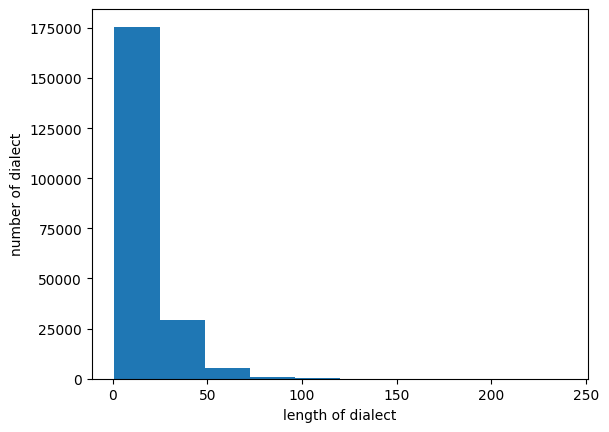

In [11]:
plt.hist(sentenceLengths(filtered_data_TR['src']), bins=10)
plt.xlabel('length of dialect')
plt.ylabel('number of dialect')
plt.show()

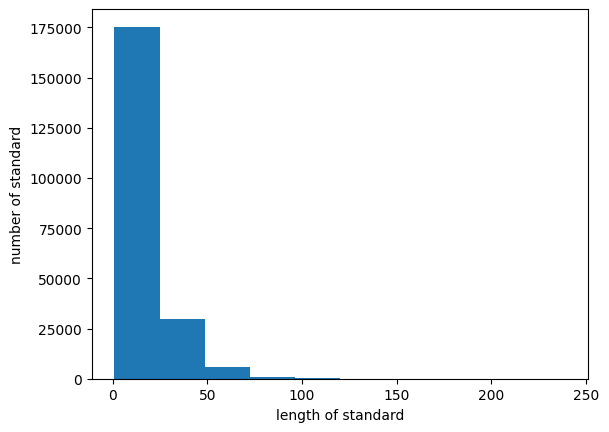

In [12]:
plt.hist(sentenceLengths(filtered_data_TR['tar']), bins=10)
plt.xlabel('length of standard')
plt.ylabel('number of standard')
plt.show()

In [13]:
def threshold_len_max(max_len, data):
    data = list(data)  # 제네레이터를 리스트로 변환
    sentence_count = 0
    for sentence in data:
        if len(sentence) <= max_len:
            sentence_count += 1
    return sentence_count / len(data) * 100

def threshold_len_min(min_len, data):
    data = list(data)  # 제네레이터를 리스트로 변환
    sentence_count = 0
    for sentence in data:
        if len(sentence) >= min_len:
            sentence_count += 1
    return sentence_count / len(data) * 100

In [16]:
len(filtered_data_TR['src'])

211878

In [15]:
max_len = 22
dialect_max = threshold_len_max(max_len, (sentence.split(' ') for sentence in filtered_data_TR['src']))
standard_max = threshold_len_max(max_len, (sentence.split(' ') for sentence in filtered_data_TR['tar']))

print(f"dialect 중 {max_len} 이하인 비율은 {dialect_max}")
print(f"standard 중 {max_len} 이하인 비율은 {standard_max}")

dialect 중 22 이하인 비율은 80.23060440442141
standard 중 22 이하인 비율은 80.11355591425254


In [17]:
## 문장의 길이가 긴 것이 많아 80프로 정도의 데이터만 남김

d_filter_indices = [i for i, sentence in enumerate(sentence.split(' ') for sentence in filtered_data_TR['src']) if len(sentence) <= max_len ]
s_filter_indices = [i for i, sentence in enumerate(sentence.split(' ') for sentence in filtered_data_TR['tar']) if len(sentence) <= max_len ]

In [18]:
indices = list(set(d_filter_indices) & set(s_filter_indices))

In [20]:
len(indices)

169723

In [22]:
import tqdm

filtered_dialect = []
filtered_standard = []

for i in tqdm.tqdm(range(len(filtered_data_TR['src']))):
    if i in indices:
        filtered_dialect.append(filtered_data_TR['src'][i])
        filtered_standard.append(filtered_data_TR['tar'][i])

100%|██████████| 211878/211878 [04:34<00:00, 772.53it/s]


In [ ]:
import pickle

# 전처리된 데이터 피클 파일로 저장
with open('/content/drive/MyDrive/LSTM+attention/filtered_dialect.pkl', 'wb') as f:
    pickle.dump(filtered_dialect, f)

with open('/content/drive/MyDrive/LSTM+attention/filtered_standard.pkl', 'wb') as f:
    pickle.dump(filtered_standard, f)

In [ ]:
# pickle 파일로부터 데이터를 불러옴
with open('filtered_dialect.pkl', 'rb') as f:
    loaded_filtered_dialect = pickle.load(f)

with open('filtered_standard.pkl', 'rb') as f:
    loaded_filtered_standard = pickle.load(f)

In [24]:
print(len(filtered_dialect))
print(len(filtered_standard))

169723
169723


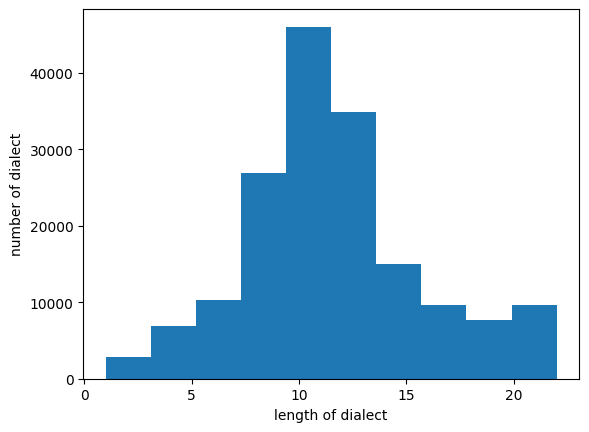

In [26]:
plt.hist(sentenceLengths(filtered_dialect), bins=10)
plt.xlabel('length of dialect')
plt.ylabel('number of dialect')
plt.show()

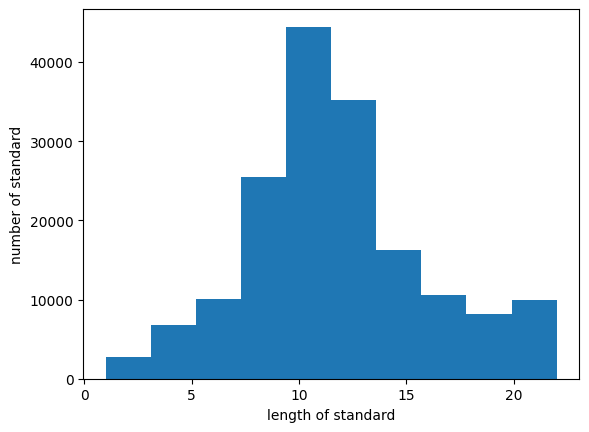

In [27]:
plt.hist(sentenceLengths(filtered_standard), bins=10)
plt.xlabel('length of standard')
plt.ylabel('number of standard')
plt.show()

In [28]:
SOS_token = 0
EOS_token = 0

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2 # SOS, EOS

    def addSentence(self, sentence):
        for word in sentence.split(" "):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [30]:
# Lang 객체 생성
dialect_lang = Lang("Dialect")
standard_lang = Lang("Standard")

# 문장 추가
for sentence in filtered_dialect:
    dialect_lang.addSentence(sentence)
for sentence in filtered_standard:
    standard_lang.addSentence(sentence)
for sentence in filtered_df_VL['src']:
    dialect_lang.addSentence(sentence)
for sentence in filtered_df_VL['tar']:
    standard_lang.addSentence(sentence)

# 문장
pairs = list(zip(filtered_dialect, filtered_standard))
VL_pairs = list(zip(filtered_df_VL['src'], filtered_df_VL['tar']))

# 문장을 인덱스로 변환
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    if len(indexes) < max_len:
        indexes.extend([EOS_token] * (max_len - len(indexes)))  # 패딩 추가
    return torch.tensor(indexes[:max_len], dtype=torch.long).view(-1, 1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(dialect_lang, pair[0])
    target_tensor = tensorFromSentence(standard_lang, pair[1])
    return (input_tensor, target_tensor)

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim

# 검증 데이터를 인덱스로 변환
validation_input_tensors = [tensorFromSentence(dialect_lang, pair[0]) for pair in VL_pairs]
validation_target_tensors = [tensorFromSentence(standard_lang, pair[1]) for pair in VL_pairs]

class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.lstm(embedded, hidden)
        return output, hidden

    def initHidden(self):
        return (torch.zeros(1, 1, self.hidden_size),
                torch.zeros(1, 1, self.hidden_size))

class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=max_len):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.lstm = nn.LSTM(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = nn.functional.softmax(
            self.attn(torch.cat((embedded[0], hidden[0][0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = nn.functional.relu(output)
        output, hidden = self.lstm(output, hidden)

        output = nn.functional.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return (torch.zeros(1, 1, self.hidden_size),
                torch.zeros(1, 1, self.hidden_size))

In [ ]:
import random
import time
import math

def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return f'{m}m {s:.2f}s'

def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return f'{asMinutes(s)} (- {asMinutes(rs)})'

def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=max_len):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]])

    decoder_hidden = encoder_hidden

    for di in range(target_length):
        decoder_output, decoder_hidden, decoder_attention = decoder(
            decoder_input, decoder_hidden, encoder_outputs)
        topv, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze().detach()  # 다음 입력으로 사용

        loss += criterion(decoder_output, target_tensor[di])
        if decoder_input.item() == EOS_token:
            break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

def trainIters(encoder, decoder, n_iters, print_every=1000, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0
    plot_loss_total = 0

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs)) for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print(f'{timeSince(start, iter / n_iters)} ({iter} {iter / n_iters * 100:.2f}%) {print_loss_avg:.4f}')

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

def showPlot(points):
    plt.figure()
    plt.plot(points)
    plt.title('Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()

In [ ]:
# 모델 초기화 및 훈련
hidden_size = 256
encoder = EncoderRNN(dialect_lang.n_words, hidden_size)
decoder = AttnDecoderRNN(hidden_size, standard_lang.n_words, dropout_p=0.1)

trainIters(encoder, decoder, 75000, print_every=5000)

In [ ]:
def saveModel(encoder, decoder, encoder_path='encoder.pth', decoder_path='decoder.pth'):    ## 모델 저장
    torch.save(encoder.state_dict(), encoder_path)
    torch.save(decoder.state_dict(), decoder_path)

def loadModel(encoder_path='encoder.pth', decoder_path='decoder.pth'):      ## 모델 로드
    encoder = EncoderRNN(dialect_lang.n_words, hidden_size)
    decoder = AttnDecoderRNN(hidden_size, standard_lang.n_words, dropout_p=0.1)
    encoder.load_state_dict(torch.load(encoder_path))
    decoder.load_state_dict(torch.load(decoder_path))
    return encoder, decoder


In [ ]:
# 테스트 함수

def evaluate(encoder, decoder, sentence, max_length=max_len):
    with torch.no_grad():
        input_tensor = tensorFromSentence(dialect_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] = encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]])  # SOS token
        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(standard_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words

def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(test_pairs)
        print('Dialect:', pair[0])
        print('Expected:', pair[1])
        output_words = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('Predicted:', output_sentence)
        print('')


In [ ]:
## 테스트 데이터 준비 필요
test_dialect_sentences = []
test_standard_sentences = []

test_pairs = list(zip(test_dialect_sentences, test_standard_sentences))

In [ ]:
## 테스트 함수 실행
evaluateRandomly(encoder, decoder, n=len(test_pairs))